# Import Libraries

In [1]:
import math
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from math import sqrt
from pandas import concat
from matplotlib import pyplot
from keras.models import Sequential
from numpy import concatenate, asarray
from keras.layers import Dense, Dropout, GRU
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

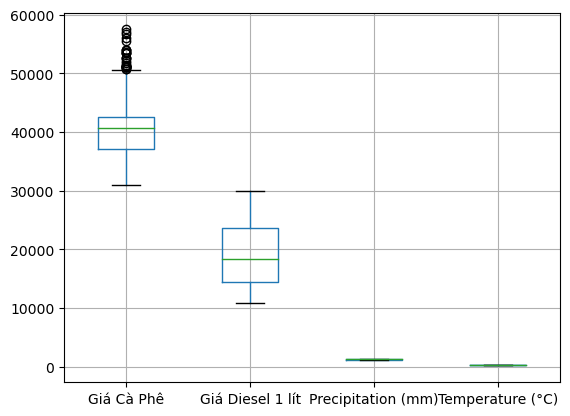

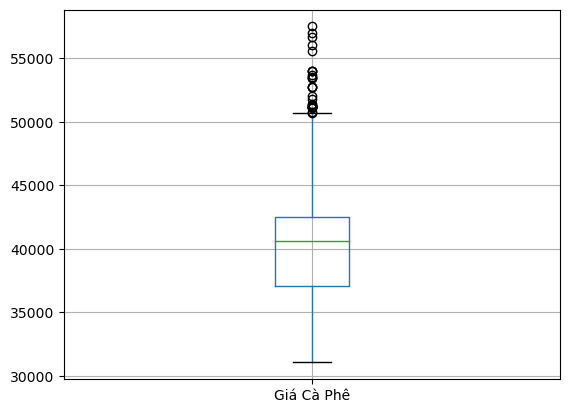

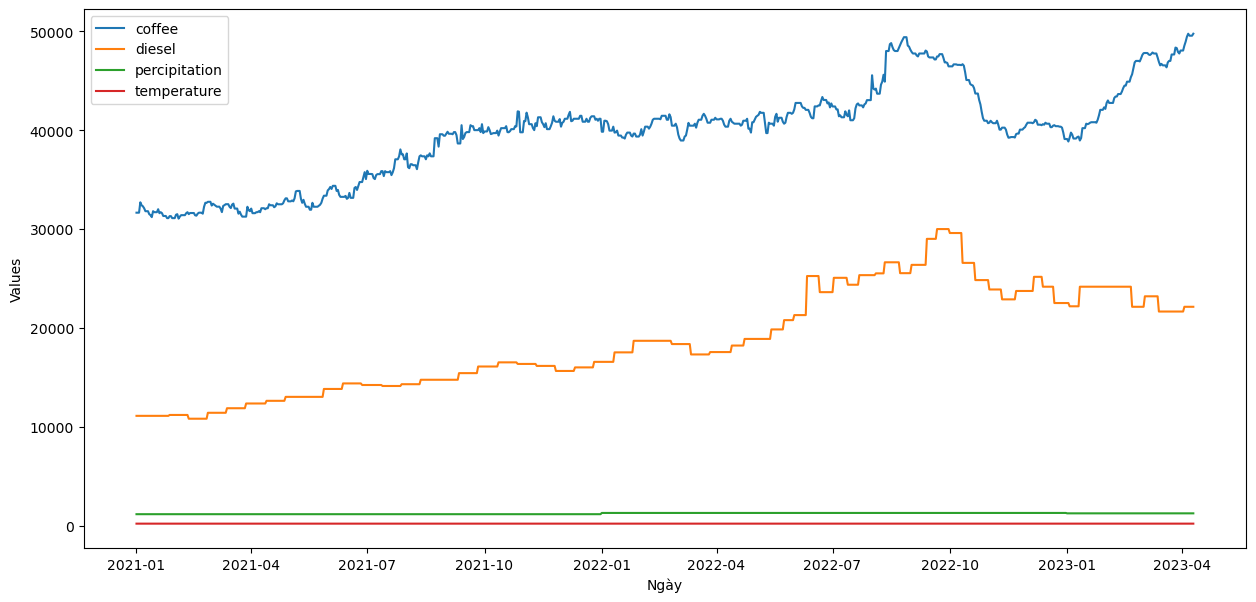

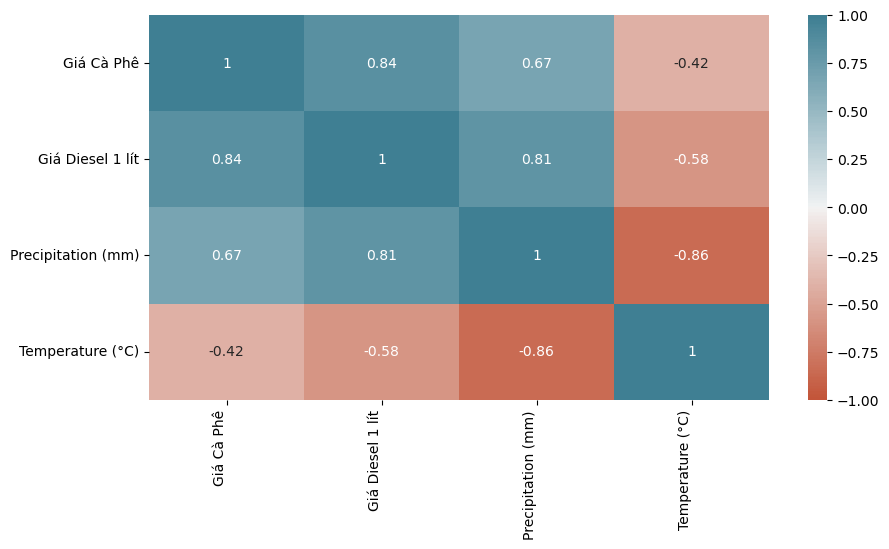

Stored 'data' (DataFrame)


In [2]:
%run Data.ipynb

# ---------- Retrieve Data -----------

In [3]:
%store -r data
data

,Ngày,Giá Cà Phê,Giá Diesel 1 lít,Precipitation (mm),Temperature (°C)
0,2021-01-01,31667.5,11120.0,1174.199994,217.0
1,2021-01-02,31667.5,11120.0,1174.199994,217.0
2,2021-01-03,31667.5,11120.0,1174.199994,217.0
3,2021-01-04,32717.0,11120.0,1174.199994,217.0
4,2021-01-05,32417.0,11120.0,1174.199994,217.0
...,...,...,...,...,...
825,2023-04-06,49766.5,22150.0,1259.800013,218.0
826,2023-04-07,49566.5,22150.0,1259.800013,218.0
827,2023-04-08,49566.5,22150.0,1259.800013,218.0
828,2023-04-09,49566.5,22150.0,1259.800013,218.0


In [4]:
# take coffee price only
data.drop(data.columns[[-1, -2, -3]], axis=1, inplace=True)

In [5]:
data

,Ngày,Giá Cà Phê
0,2021-01-01,31667.5
1,2021-01-02,31667.5
2,2021-01-03,31667.5
3,2021-01-04,32717.0
4,2021-01-05,32417.0
...,...,...
825,2023-04-06,49766.5
826,2023-04-07,49566.5
827,2023-04-08,49566.5
828,2023-04-09,49566.5


# --------- Normalization ----------

In [6]:
# drop date column
data.drop(data.columns[[0]], axis=1, inplace=True)

In [7]:
# set number of days
look_back = 60
predict_ahead = 30

# frame as supervised learning
reframed = series_to_supervised(data.values, look_back, predict_ahead)

In [8]:
# calculate total column to keep
data_column = len(data.columns)
keep_column = look_back * data_column
var_index = (look_back * data_column) + ((predict_ahead - 1) * data_column)

# drop unnecessary columns
reframed = reframed.drop(reframed.iloc[:, keep_column:var_index], axis = 1)
# index_drop = (data_column - 1 ) * -1
# reframed = reframed.drop(columns=reframed.columns[index_drop:], axis = 1)
# dataset = reframed

In [9]:
reframed

,var1(t-60),var1(t-59),var1(t-58),var1(t-57),var1(t-56),var1(t-55),var1(t-54),var1(t-53),var1(t-52),var1(t-51),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t+29)
60,31667.5,31667.5,31667.5,32717.0,32417.0,32317.0,32117.0,31817.0,31817.0,31817.0,...,31667.0,31567.0,32267.0,32667.0,32667.00,32767.00,32767.00,32767.00,32388.75,31817.0
61,31667.5,31667.5,32717.0,32417.0,32317.0,32117.0,31817.0,31817.0,31817.0,31517.0,...,31567.0,32267.0,32667.0,32667.0,32767.00,32767.00,32767.00,32388.75,32575.00,32081.5
62,31667.5,32717.0,32417.0,32317.0,32117.0,31817.0,31817.0,31817.0,31517.0,31417.0,...,32267.0,32667.0,32667.0,32767.0,32767.00,32767.00,32388.75,32575.00,32475.00,31617.0
63,32717.0,32417.0,32317.0,32117.0,31817.0,31817.0,31817.0,31517.0,31417.0,31217.0,...,32667.0,32667.0,32767.0,32767.0,32767.00,32388.75,32575.00,32475.00,32375.00,31617.0
64,32417.0,32317.0,32117.0,31817.0,31817.0,31817.0,31517.0,31417.0,31217.0,31817.0,...,32667.0,32767.0,32767.0,32767.0,32388.75,32575.00,32475.00,32375.00,32275.00,31617.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,39166.5,39166.5,39316.5,39366.5,38966.5,39216.5,40216.5,40216.5,40216.5,40666.5,...,46966.5,47266.5,47616.5,47800.0,47816.50,47816.50,47816.50,47666.50,47616.50,49766.5
796,39166.5,39316.5,39366.5,38966.5,39216.5,40216.5,40216.5,40216.5,40666.5,40616.5,...,47266.5,47616.5,47800.0,47816.5,47816.50,47816.50,47666.50,47616.50,47716.50,49566.5
797,39316.5,39366.5,38966.5,39216.5,40216.5,40216.5,40216.5,40666.5,40616.5,40666.5,...,47616.5,47800.0,47816.5,47816.5,47816.50,47666.50,47616.50,47716.50,47866.50,49566.5
798,39366.5,38966.5,39216.5,40216.5,40216.5,40216.5,40666.5,40616.5,40666.5,40766.5,...,47800.0,47816.5,47816.5,47816.5,47666.50,47616.50,47716.50,47866.50,47766.50,49566.5


In [10]:
# normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(reframed)
scaled.shape

(740, 61)

# ---------- Split data ----------

In [11]:
dataset = scaled

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

592 148


In [12]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(592, 1, 60) (592,) (148, 1, 60) (148,)


# ---------- Train Model ----------

Epoch 1/1000
10/10 [==============================] - 5s 88ms/step - loss: 0.2744 - val_loss: 0.1966
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0890 - val_loss: 0.1889
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0828 - val_loss: 0.1855
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0896 - val_loss: 0.1821
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0879 - val_loss: 0.1808
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0942 - val_loss: 0.1782
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0853 - val_loss: 0.1770
Epoch 8/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0874 - val_loss: 0.1746
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0808 - val_loss: 0.1729
Epoch 10/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0871 - val_loss: 0.170

10/10 [==============================] - 0s 5ms/step - loss: 0.0630 - val_loss: 0.1221
Epoch 163/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0676 - val_loss: 0.1345
Epoch 164/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0586 - val_loss: 0.1416
Epoch 165/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0601 - val_loss: 0.1225
Epoch 166/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0655 - val_loss: 0.1350
Epoch 167/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0577 - val_loss: 0.1397
Epoch 168/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0580 - val_loss: 0.1233
Epoch 169/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0645 - val_loss: 0.1345
Epoch 170/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0581 - val_loss: 0.1399
Epoch 171/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0595 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0602 - val_loss: 0.1194
Epoch 323/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0530 - val_loss: 0.1193
Epoch 324/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0528 - val_loss: 0.1160
Epoch 325/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0525 - val_loss: 0.1201
Epoch 326/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0513 - val_loss: 0.1133
Epoch 327/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0544 - val_loss: 0.1151
Epoch 328/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0557 - val_loss: 0.1255
Epoch 329/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0529 - val_loss: 0.1077
Epoch 330/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0622 - val_loss: 0.1216
Epoch 331/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0522 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0585 - val_loss: 0.1082
Epoch 483/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0537 - val_loss: 0.1233
Epoch 484/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0566 - val_loss: 0.1071
Epoch 485/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0628 - val_loss: 0.1131
Epoch 486/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0545 - val_loss: 0.1070
Epoch 487/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0612 - val_loss: 0.1215
Epoch 488/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0643 - val_loss: 0.1347
Epoch 489/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0596 - val_loss: 0.1187
Epoch 490/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0533 - val_loss: 0.1196
Epoch 491/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0550 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0591 - val_loss: 0.1066
Epoch 643/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0501 - val_loss: 0.1141
Epoch 644/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0509 - val_loss: 0.1061
Epoch 645/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0528 - val_loss: 0.1151
Epoch 646/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0505 - val_loss: 0.1076
Epoch 647/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0517 - val_loss: 0.1117
Epoch 648/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0486 - val_loss: 0.1081
Epoch 649/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0497 - val_loss: 0.1065
Epoch 650/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0485 - val_loss: 0.1130
Epoch 651/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0505 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0524 - val_loss: 0.1140
Epoch 803/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0567 - val_loss: 0.1185
Epoch 804/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0497 - val_loss: 0.1026
Epoch 805/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0517 - val_loss: 0.1189
Epoch 806/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0552 - val_loss: 0.1229
Epoch 807/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0558 - val_loss: 0.1103
Epoch 808/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.1118
Epoch 809/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0479 - val_loss: 0.1073
Epoch 810/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0487 - val_loss: 0.1147
Epoch 811/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0469 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0491 - val_loss: 0.1062
Epoch 963/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0484 - val_loss: 0.1095
Epoch 964/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0499 - val_loss: 0.1027
Epoch 965/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0493 - val_loss: 0.1110
Epoch 966/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0509 - val_loss: 0.1074
Epoch 967/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0478 - val_loss: 0.1044
Epoch 968/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0462 - val_loss: 0.1003
Epoch 969/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0484 - val_loss: 0.1117
Epoch 970/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0514 - val_loss: 0.1100
Epoch 971/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0481 - val_loss: 0.

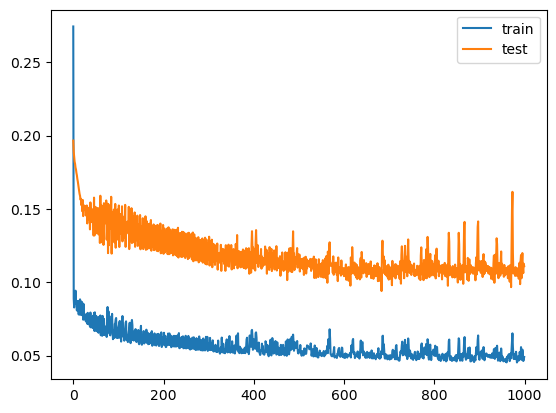

In [13]:
# Create the GRU model
model = Sequential()
model.add(GRU(75, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(GRU(units=32, return_sequences=True))
model.add(GRU(units=32))
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=1000,validation_data=(test_X, test_y), batch_size=64, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# ---------- Testing & Results Analysis ----------

In [14]:
# calculate metrics
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = sklearn.metrics.mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

def print_metrics(test, pre_test):
    
    testScore = np.sqrt(mean_squared_error(test,pre_test))
    print('RMSE: %.2f (đồng)' % (testScore))
    
    testScore = sklearn.metrics.mean_absolute_error(test, pre_test)
    print('\nMAE: %.2f (đồng)' % (testScore))
                            
    testScore = sklearn.metrics.mean_absolute_percentage_error(test, pre_test)
    print('\nMAPE: %.2f' % (testScore))
    
    testScore = mean_absolute_scaled_error(test, pre_test, test)
    print('\nMASE: %.2f' % (testScore))

In [15]:
# make a prediction
test_pred = (model.predict(test_X))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

5/5 [==============================] - 1s 2ms/step


In [16]:
# invert scaling for forecast
inv_test_pred = concatenate((test_pred, test_X), axis=1)
inv_test_pred = scaler.inverse_transform(inv_test_pred)
inv_test_pred = inv_test_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [17]:
# print results
print_metrics(inv_y, inv_test_pred)

RMSE: 2578.64 (đồng)

MAE: 2036.36 (đồng)

MAPE: 0.05

MASE: 11.69


# ---------- Predicting ----------

In [18]:
# take the last look back days
df = data.tail(look_back)

In [19]:
# normalize features
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [20]:
# convert rows to columns
dataset = df.T

# convert
# dataset = df.to_numpy() 

# reshape
X = dataset.reshape((dataset.shape[0], 1, dataset.shape[1]))

In [21]:
# predict
prediction = model.predict(X)

1/1 [==============================] - 0s 15ms/step


In [22]:
# replace 1st value by prediction result in order to invert scale
df[0] = prediction

# invert scaling
inv_prediction = scaler.inverse_transform(df)
final_result = inv_prediction[0]

In [23]:
final_result[0]

48325.8488574028

In [24]:
%store data

Stored 'data' (DataFrame)


In [1]:
data

NameError: name 'data' is not defined